In [4]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import LocallyLinearEmbedding as LLE
%matplotlib inline
%run nifti_tools.ipynb
%run overlap_functions.ipynb

In [2]:
# Loading the voxel * gene matrix
X = np.load('/data/bioprotean/ABA/MEMMAP/genes_list/genes_half_mask_pos_std.npy')

In [ ]:
# Running Locally Linear Embedding
n = 200
embedding = LocallyLinearEmbedding(n_components = n)
X_t = embedding.fit_transform(X)

# Saving features
np.save('/data/bioprotean/ABA/LLE/'+str(n)+'_components.npy', X_t)

In [3]:
# Loading components
components = np.load('/data/bioprotean/ABA/LLE/200_components.npy')

In [5]:
# Running K-means
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, n_init=50, random_state=0)
kmeans.fit_predict(components)
labels = kmeans.labels_

In [7]:
# Reconstructing the labels
indices_path = '/data/bioprotean/ABA/MEMMAP/genes_list/half_indices.npy'
labels_rc = reconstruct_ABA(labels, indices_path)

In [10]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int32)

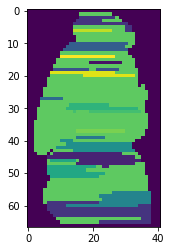

In [11]:
#Visualizing one slice
vol = labels_rc.reshape(67,58,41)
s = vol[:,30,:]
plt.imshow(s)